In [33]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [34]:
# ####################################################################
# initial parameters
N=4.6 # valore massimo (V)

L1 = 0.3775 # prima distanza (metri)
L2 = 0.44  # seconda distanza (metri)
L3 = 0.78 # terza distanza (metri)
L = (L1, L2, L1, L2, L1)  # distanza fenditura - schermo (m)

slit_width = 70e-6 # metri
slit_width_err = 2e-6 # metri

d=70.0e-06 # larghezza della fenditura (m)
b0=5.0 # background costante (V)    
LAMBDA=700.E-9 # lunghezza d'onda della luce (m)
x0=71000*10**-6 # posizione del massimo del picco di diffrazione (m)
res = 0.0025 #risoluzione strumentale
# ####################################################################

In [35]:
# ####################################################################
# get dataset from file
filename = ("dati/diff_gain10_coll1-L37.txt", "dati/diff_gain10_coll1-L44.txt", "dati/diff_gain10_coll2-L37.txt", "dati/diff_gain10_coll2-L44.txt", "dati/diff_gain10_coll3-L37.txt")

#per salvataggio immagini
#figs = ("./FiguraDiffrazione1.png", "./FiguraDiffrazione2.png", "./FiguraDiffrazione3.png", "./FiguraDiffrazione4.png", "./FiguraDiffrazione5.png")

#initializing
popt = [None]*5
pcov = [None]*5
chi2_ridotto = np.zeros(5)
# ####################################################################

[0.0025     0.0025     0.0025     0.00257347 0.0025     0.00252147
 0.0025     0.0025     0.0025     0.0025     0.00252147 0.00252147
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.00252147 0.0025     0.00252147
 0.0025     0.00257347 0.0025     0.0025     0.00252147 0.00252147
 0.00252147 0.00257347 0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.00252147 0.0025     0.0025     0.0025
 0.00257347 0.0025     0.0025     0.0025     0.0025     0.0025
 0.00252147 0.00277171 0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.00257347 0.0025     0.0025     0.0025     0.00257347 0.0025
 0.00257347 0.00257347 0.0025     0.0025     0.0025     0.00252147
 0.0025     0.0025     0.00257347 0.00257347 0.0025     0.0025
 0.0025     0.0025     0.00252147 0.0025     0.00252147 0.00252147
 0.00252147 0.0025     0.0025  

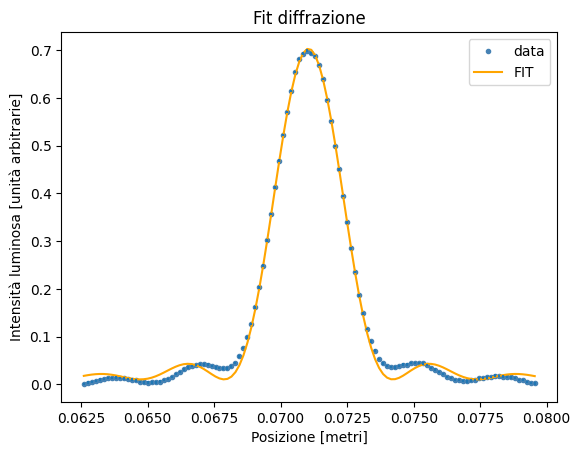

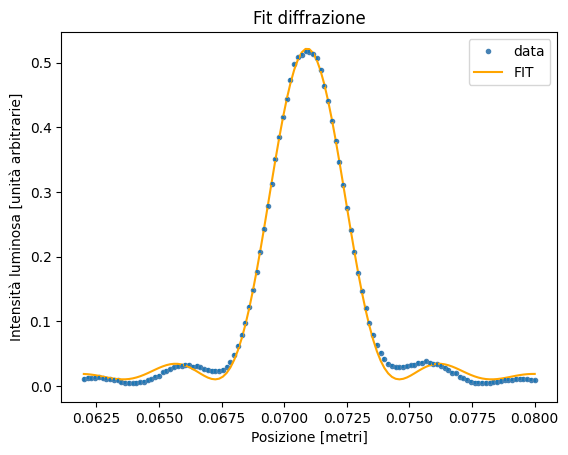

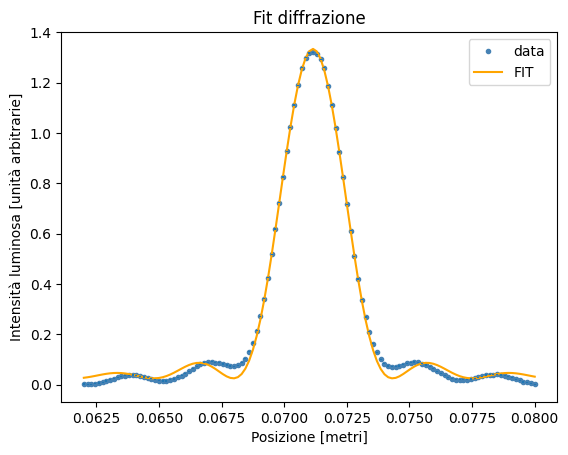

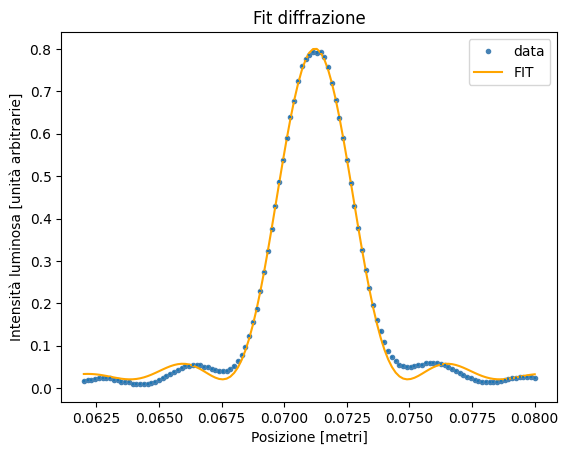

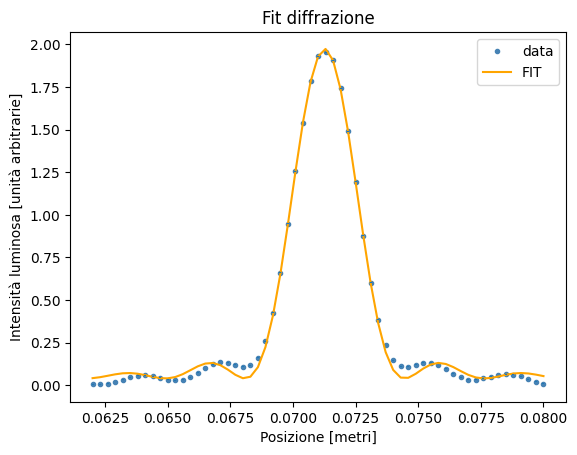

In [36]:
for i in range(0,5):

# function to be fitted
    def diffrazione(x, N, b0,LAMBDA,x0): # y = 
        sin_theta = (x-x0)/np.sqrt((x-x0)**2+L[i]**2)
        y = d/LAMBDA*sin_theta
        return b0+N*np.sinc(y)**2 # np.sinc(x) = sin(pi*x) / (pi*x) by definition

    x,y, yerr = np.loadtxt(filename[i], unpack=True)
    x = x*10**-6 #micro meters -> meters

    for j in np.arange(yerr.size):
        if yerr[j] < res:
            yerr[j] = res

    print(yerr)

            
    P0 = [N,b0,LAMBDA,x0] 
    popt[i], pcov[i] = curve_fit(diffrazione, # function to be fitted (defined above)
                       x, y, # data 
                       p0 = P0, # guessed parameters (used as starting values)
                       sigma = yerr, # error on y
                       maxfev=5000000 # the more difficult is the function, the longer it takes to fit the data. If maxfev is too short, it gives a RuntimeError
                       )
    print( f"FIT PARAMS\n\n\nN={popt[i][0]}\nb0={popt[i][1]}\nLAMBDA={popt[i][2]}\nx0={popt[i][3]}\n\nCOVARIANCE MATRIX = \n{pcov[i]}")
    # ####################################################################
    # plot data and fit
    fig, axes = plt.subplots()

    #plt.errorbar(x,y,yerr=yerr, linestyle= '.', color = "steelblue") # uncomment to show also errorbars
    plt.plot(x,y, '.', label = "data", color = 'steelblue')
    plt.plot(x,diffrazione(x, *popt[i]), 
            color = 'orange', 
            label = "FIT")
    plt.errorbar(x, y,
             yerr = yerr,
             fmt ='none')

    plt.legend() 
    plt.xlabel("Posizione [metri]")
    plt.ylabel("Intensità luminosa [unità arbitrarie]")
    plt.title("Fit diffrazione")

    z = ((diffrazione(x,popt[i][0], popt[i][1], popt[i][2] ,popt[i][3]) - y)/yerr)**2
    chi2 = 0
    for m in range(0, x.size):
        chi2+= z[m]
    chi2_ridotto[i] = chi2/(y.size-4)
    print("chi2 ridotto:",chi2_ridotto[i])

In [37]:
#be sure to run all when using this cell
for i in range(5):
    print(i, ") ", "LAMBDA: ", popt[i][2], " +/-  ", np.sqrt(pcov[i][2][2]*chi2_ridotto[i]))

0 )  LAMBDA:  5.872648262941548e-07  +/-   1.6090996790023216e-08
1 )  LAMBDA:  5.847542082242772e-07  +/-   9.134951058116282e-09
2 )  LAMBDA:  5.89252360643619e-07  +/-   3.0733923760126236e-08
3 )  LAMBDA:  5.872182090783522e-07  +/-   1.5628093436037883e-08
4 )  LAMBDA:  5.905188828834143e-07  +/-   6.386054409122508e-08


In [38]:
# ####################################################################
# get dataset from file
filename = ("dati/inter_gain1_coll2_L78_g3_b2.txt", "dati/inter_gain1_coll2_L78_g10_b15.txt", "dati/inter_gain1_coll2_L78_g25_b15.txt")

#per salvataggio immagini
#figs = ("./FiguraInterferenza1.png", "./FiguraInterferenza2.png", "./FiguraInterferenza3.png")

popt = [None]*3
pcov = [None]*3

d = (0.2e-3, 0.15e-3, 0.15e-3)
D = (0.3e-3, 1e-3, 0.25e-3)
L = L3
N = (0.6, 0.6, 0.6)
x0 = (0.071, 0.0715, 0.071)
# ####################################################################

# for removing tails
tails = np.array([[34,140],[27,182],[26,161]])

FIT PARAMS


N=1.2123414614146464
b0=0.004620186955776454
LAMBDA=6.792609762058588e-07
x0=0.07143345251631122
D=0.000300185197989081

COVARIANCE MATRIX = 
[[ 5.50293242e-05 -7.64034369e-06 -4.15008203e-12 -1.71435527e-12
  -1.98707935e-10]
 [-7.64034369e-06  5.27602481e-06 -3.28911744e-12 -1.22806920e-11
  -1.38820558e-09]
 [-4.15008203e-12 -3.28911744e-12  1.60304486e-17  7.86978410e-19
   5.69740421e-15]
 [-1.71435527e-12 -1.22806920e-11  7.86978410e-19  5.43637746e-12
   9.16534258e-15]
 [-1.98707935e-10 -1.38820558e-09  5.69740421e-15  9.16534258e-15
   3.24854397e-12]]

chi2 ridotto: 54.74150406169068
FIT PARAMS


N=0.08447880221247527
b0=0.00589535207377496
LAMBDA=5.5809002436507e-07
x0=0.07152891574565784
D=0.0008357950965775864

COVARIANCE MATRIX = 
[[ 6.60317090e-07 -1.68183805e-07 -4.23050884e-13  1.50363505e-12
  -6.35770547e-10]
 [-1.68183805e-07  1.45085686e-07 -1.23124110e-12 -1.73184246e-12
  -1.84105880e-09]
 [-4.23050884e-13 -1.23124110e-12  3.49523327e-17  2.05412129e

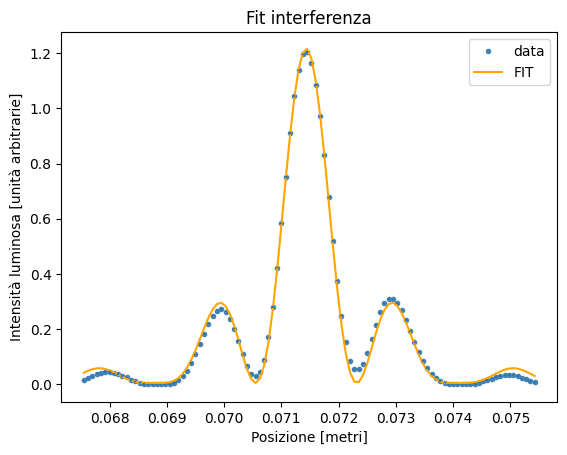

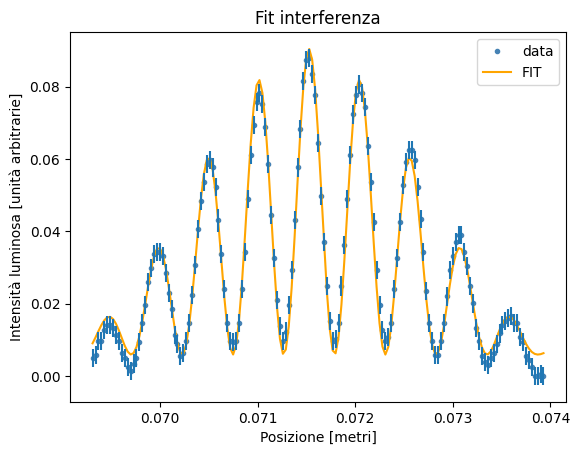

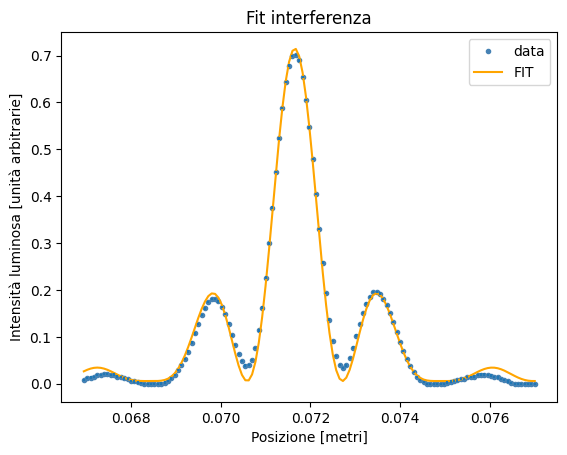

In [39]:

for i in range(0,3):
# function to be fitted
    def interferenza(x, N, b0,LAMBDA,x0, D):

        sin_theta = (x-x0)/np.sqrt((x-x0)**2+L**2)

        #todo: capire dove va via il pi greco nella formula
        y = d[i]/LAMBDA*sin_theta

        y2 = np.cos(np.pi*D/LAMBDA*sin_theta)**2*np.sinc(y)**2 # np.sinc(x) = sin(pi*x) / (pi*x) by definition

        return b0 + N*y2

    x,y, yerr = np.loadtxt(filename[i], unpack=True)
    x = x*1e-6  #micro meters -> meters

    for j in np.arange(yerr.size):
        if yerr[j] < res:
            yerr[j] = res

    #removing tails from data
    x = x[tails[i][0]:tails[i][1]]
    y = y[tails[i][0]:tails[i][1]]
    yerr = yerr[tails[i][0]:tails[i][1]]
            

    P0 = [N[i],b0,LAMBDA,x0[i],D[i]]
    popt[i], pcov[i] = curve_fit(interferenza, # function to be fitted (defined above)
                       x, y, # data 
                       p0 = P0, # guessed parameters (used as starting values)
                       sigma = yerr, # error on y
                       maxfev=5000000 # the more difficult is the function, the longer it takes to fit the data. If maxfev is too short, it gives a RuntimeError
                       )
    # ####################################################################
    # plot data and fit
    fig, axes = plt.subplots()

    #plt.errorbar(x,y,yerr=yerr, linestyle= '.', color = "steelblue") # uncomment to show also errorbars
    plt.plot(x,y, '.', label = "data", color = 'steelblue')
    plt.plot(x,interferenza(x, *popt[i]), 
            color = 'orange', 
            label = "FIT")
    plt.errorbar(x, y,
             yerr = yerr,
             fmt ='none')

    plt.legend() 
    plt.xlabel("Posizione [metri]")
    plt.ylabel("Intensità luminosa [unità arbitrarie]")
    plt.title("Fit interferenza")

    print( f"FIT PARAMS\n\n\nN={popt[i][0]}\nb0={popt[i][1]}\nLAMBDA={popt[i][2]}\nx0={popt[i][3]}\nD={popt[i][4]}\n\nCOVARIANCE MATRIX = \n{pcov[i]}\n")


    z = ((interferenza(x,popt[i][0], popt[i][1], popt[i][2] ,popt[i][3], popt[i][4]) - y)/yerr)**2
    chi2 = 0
    for m in range(0, x.size):
        chi2 += z[m]
        chi2_ridotto[i] = chi2/(y.size-4)
    print("chi2 ridotto:",chi2_ridotto[i])

In [40]:
#be sure to run all when using this cell
for i in range(3):
    print(i, ") ", "D: ", popt[i][4], " +/-  ", np.sqrt(pcov[i][4][4]*chi2_ridotto[i]))

0 )  D:  0.000300185197989081  +/-   1.3335298381530247e-05
1 )  D:  0.0008357950965775864  +/-   9.919811801028234e-06
2 )  D:  0.00023338970188335428  +/-   8.613162841976766e-06
